<xarray.Dataset> Size: 4kB
Dimensions:  (mixer: 2, half_evolution_time: 100, time: 100)
Coordinates:
  * mixer    (mixer) <U1 8B 'I' 'Q'
  * time     (time) int32 400B 40 120 200 280 360 ... 7640 7720 7800 7880 7960
Dimensions without coordinates: half_evolution_time
Data variables:
    q0_ro    (mixer, half_evolution_time) float64 2kB ...
    q1_ro    (mixer, half_evolution_time) float64 2kB ...
Attributes:
    start_time:  20240723_111613
    end_time:    20240723_111618
q0_ro
Parameters([('amp', <Parameter 'amp', value=-2.305058709680087e-07 +/- 5.69e-06, bounds=[-inf:inf]>), ('tau', <Parameter 'tau', value=8.259986342664345 +/- 210, bounds=[0:8.26]>), ('offset', <Parameter 'offset', value=-2.4204148064255193e-05 +/- 6.14e-06, bounds=[-1.0:1.0]>)])
q1_ro
Parameters([('amp', <Parameter 'amp', value=1.139290052404529e-05 +/- 1.26e-06, bounds=[-inf:inf]>), ('tau', <Parameter 'tau', value=1.58678878822313 +/- 0.376, bounds=[0:8.26]>), ('offset', <Parameter 'offset', value=8.623856455391

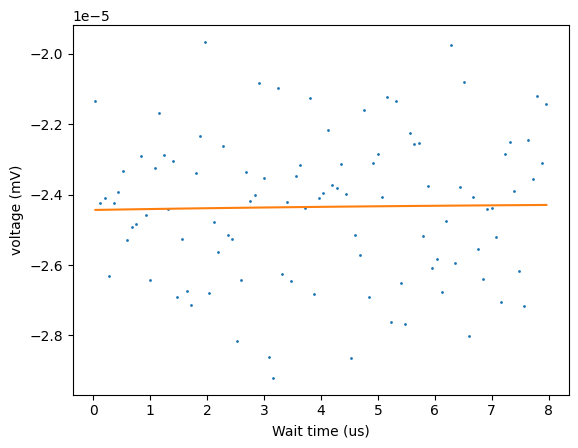

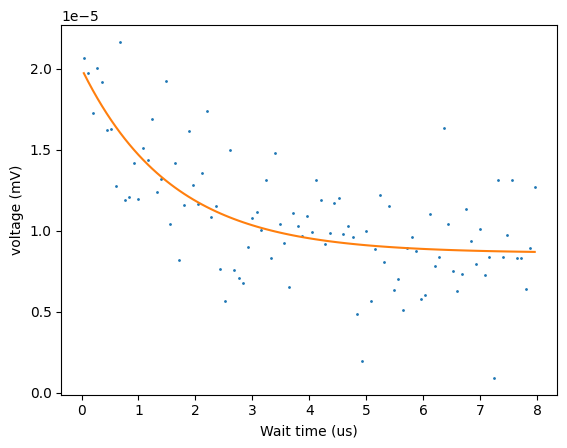

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import netCDF4
import h5netcdf
dataset = xr.open_dataset(r"c:\Users\arthu\20240723_1116_q1_xy_EchoT2.nc")
print(dataset)

time = (dataset.coords["time"].values)/1000

from qcat.visualization.qubit_relaxation import plot_qubit_relaxation
from qcat.analysis.qubit.relaxation import qubit_relaxation_fitting

for ro_name, data in dataset.data_vars.items():
    print(ro_name)
    fit_result = qubit_relaxation_fitting(time, data.values[0])
    print(fit_result.params)
    fig, ax = plt.subplots()
    plot_qubit_relaxation(time, data[0], ax, fit_result)

T1 Histogram

In [2]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os

dataset = xr.open_dataset(r"C:\Users\arthu\20240723_1051_q1_xy_T1.nc")
print(dataset)

time = (dataset.coords["time"].values)/1000
import qcat.visualization.qubit_relaxation as qv

print(dir(qv))

from qcat.visualization.qubit_relaxation import plot_time_dep_qubit_T1_relaxation_2Dmap, plot_qubit_T1_relaxation_hist
from qcat.analysis.qubit.relaxation import qubit_relaxation_fitting


#rep = dataset.coords["repetition"].values
dataset.data_vars.items()
single_name = "q4_ro"
for ro_name, data in [(single_name, dataset["q4_ro"])]:
    acc_T1 = []
    for i in range(rep.shape[-1]):
        fit_result = qubit_relaxation_fitting(time, data.values[0][i])
        acc_T1.append(fit_result.params["tau"].value)
    fig, ax = plt.subplots()
    plot_time_dep_qubit_T1_relaxation_2Dmap( rep, time, data.values[0], ax, fit_result=acc_T1)
    print(acc_T1)
    fig1, ax1 = plt.subplots()

    plot_qubit_T1_relaxation_hist( np.array(acc_T1), ax1 )



<xarray.Dataset> Size: 4kB
Dimensions:  (mixer: 2, time: 100)
Coordinates:
  * mixer    (mixer) <U1 8B 'I' 'Q'
  * time     (time) int32 400B 16 816 1616 2416 3216 ... 76816 77616 78416 79216
Data variables:
    q0_ro    (mixer, time) float64 2kB ...
    q1_ro    (mixer, time) float64 2kB ...
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_plot_T1_trace', '_plot_T2_trace', 'np', 'plot_qubit_T1_relaxation_hist', 'plot_qubit_T2_relaxation_hist', 'plot_qubit_relaxation', 'plot_time_dep_qubit_T1_relaxation_2Dmap', 'plot_time_dep_qubit_T2_relaxation_2Dmap', 'plt']


KeyError: "No variable named 'q4_ro'. Variables on the dataset include ['q0_ro', 'q1_ro', 'mixer', 'time']"